
# 📊 M5.3 散佈圖與相關係數視覺化

本課程介紹如何使用散佈圖和熱力圖來視覺化變量之間的相關性，這是數據分析中的重要技能。我們將學習如何創建有效的相關性視覺化，解釋相關係數，並從數據中發現重要的關係模式。


## 🎯 教學目標

- 📈 掌握散佈圖的創建和解釋方法
- 🔥 學習相關係數熱力圖的製作技巧
- 🎨 探索進階的相關性視覺化方法
- 💡 理解如何從視覺化中識別重要的數據關係

In [1]:
# 環境設置
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

# 忽略警告
warnings.filterwarnings('ignore')

# 設置中文字體
try:
    plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei', 'SimHei', 'Arial Unicode MS']
    plt.rcParams['axes.unicode_minus'] = False
except:
    pass

# 設置顯示選項
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', 10)
pd.set_option('display.width', 120)

# 設置繪圖風格
plt.style.use('seaborn-v0_8-whitegrid')

In [2]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# # 設置可視化風格
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

# 微軟正黑體或思源黑體路徑 (請依你電腦為準)
font_path = "C:/Windows/Fonts/msjh.ttc"  # 或 simsun.ttc, NotoSansCJK, 等

# 建立 FontProperties
font_prop = fm.FontProperties(fname=font_path)

# 設定 matplotlib 全域字型（包括標題、座標軸、legend）
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.unicode_minus'] = False  # 避免負號亂碼

# 設置顯示選項
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', 12)
pd.set_option('display.width', 100)
pd.set_option('display.precision', 2)
pd.set_option('display.float_format', '{:.2f}'.format)


## 1. 生成示例數據

In [3]:
def generate_sample_data(n_samples=1000):
    """生成示例銷售數據"""
    np.random.seed(42)
    
    data = pd.DataFrame({
        '廣告支出': np.random.normal(1000, 200, n_samples),
        '銷售額': np.random.normal(5000, 1000, n_samples),
        '客戶評分': np.random.normal(4, 0.5, n_samples),
        '客戶數量': np.random.normal(500, 100, n_samples),
        '平均訂單金額': np.random.normal(100, 20, n_samples)
    })
    
    # 添加一些相關性
    data['銷售額'] = data['銷售額'] + data['廣告支出'] * 0.5
    data['客戶數量'] = data['客戶數量'] + data['廣告支出'] * 0.3
    data['平均訂單金額'] = data['銷售額'] / data['客戶數量']
    
    return data

# 生成數據
data = generate_sample_data()


## 2. 基本散佈圖

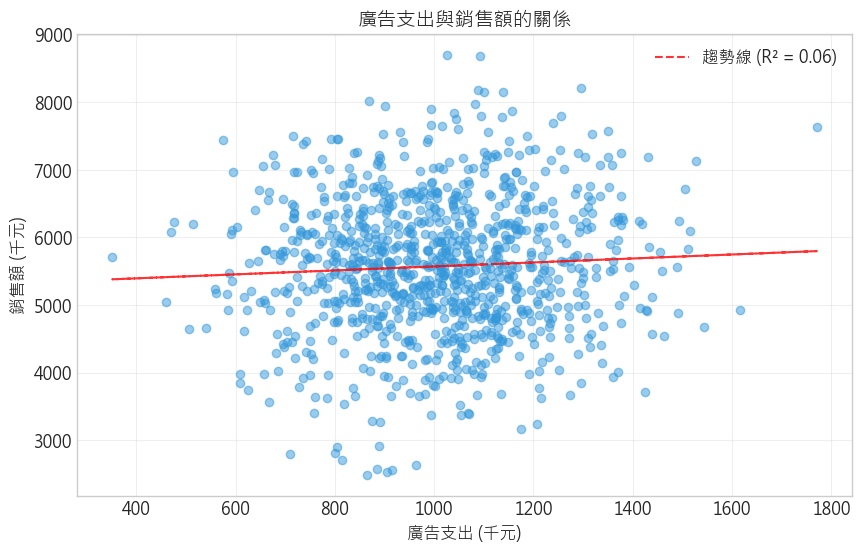

In [4]:
def basic_scatter_plot():
    """創建基本的散佈圖"""
    plt.figure(figsize=(10, 6))
    
    plt.scatter(data['廣告支出'], data['銷售額'], 
                alpha=0.5, color='#3498db')
    
    plt.title('廣告支出與銷售額的關係', fontsize=14)
    plt.xlabel('廣告支出 (千元)', fontsize=12)
    plt.ylabel('銷售額 (千元)', fontsize=12)
    
    # 添加趨勢線
    z = np.polyfit(data['廣告支出'], data['銷售額'], 1)
    p = np.poly1d(z)
    plt.plot(data['廣告支出'], p(data['廣告支出']), 
             "r--", alpha=0.8, label=f'趨勢線 (R² = {stats.pearsonr(data["廣告支出"], data["銷售額"])[0]:.2f})')
    
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

basic_scatter_plot()


## 3. 進階散佈圖矩陣

<Figure size 1200x1200 with 0 Axes>

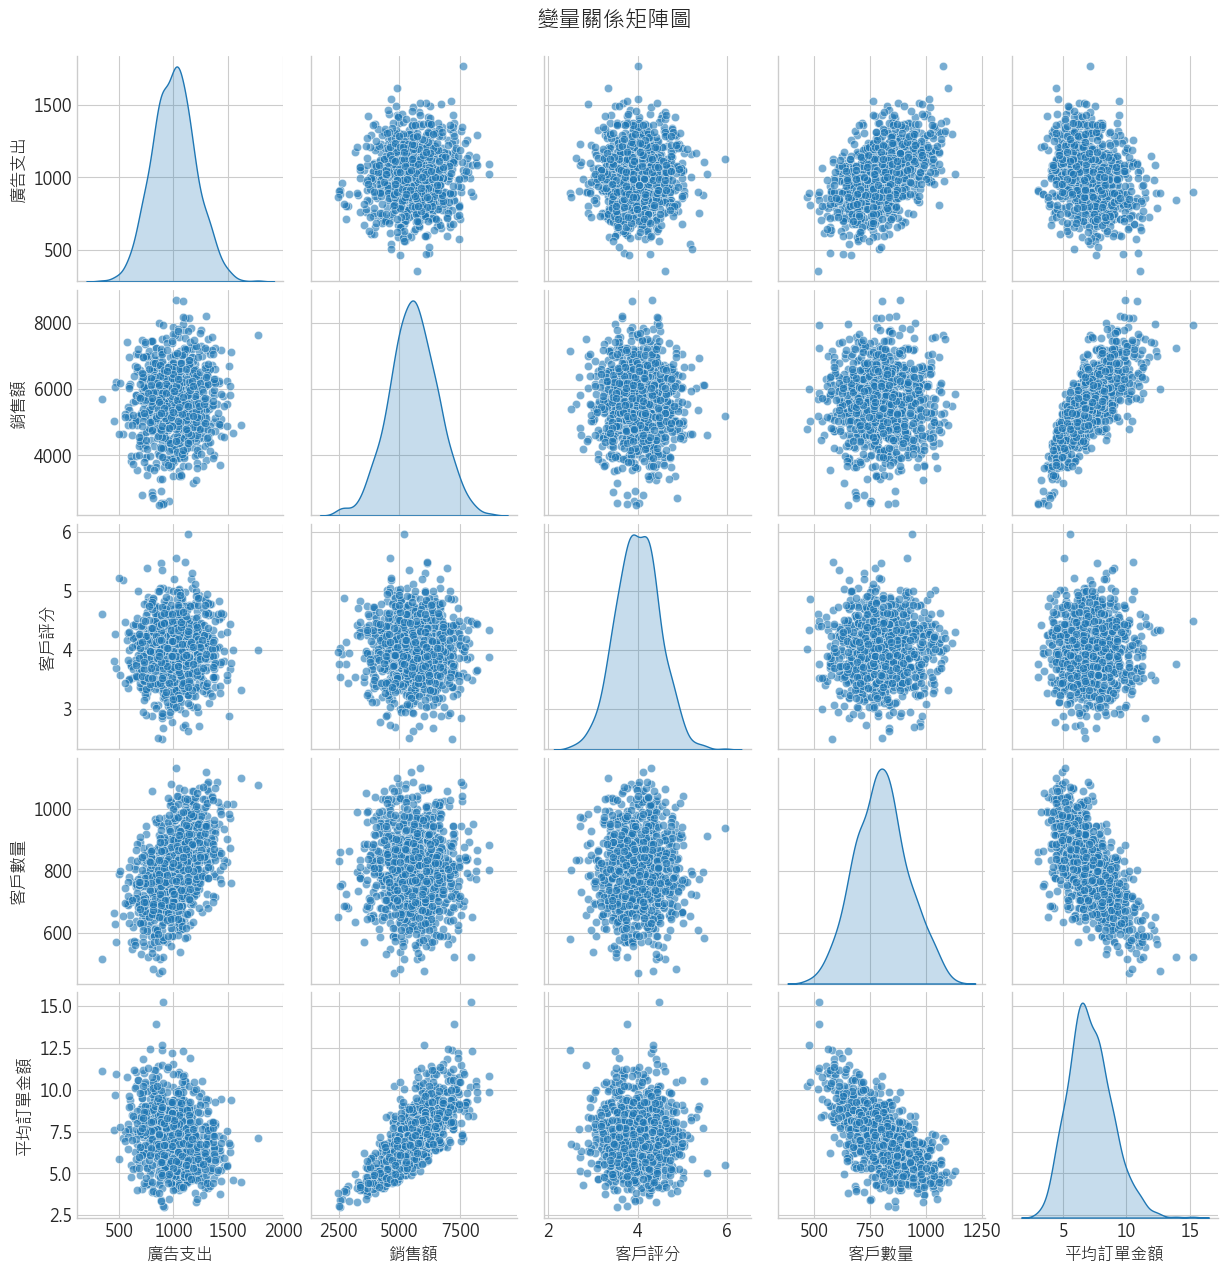

In [5]:
def scatter_matrix():
    """創建散佈圖矩陣"""
    # 設置圖表大小
    plt.figure(figsize=(12, 12))
    
    # 使用seaborn的pairplot
    sns.pairplot(data, diag_kind='kde', plot_kws={'alpha': 0.6})
    plt.suptitle('變量關係矩陣圖', y=1.02, fontsize=16)
    plt.show()

scatter_matrix()


## 4. 相關係數熱力圖

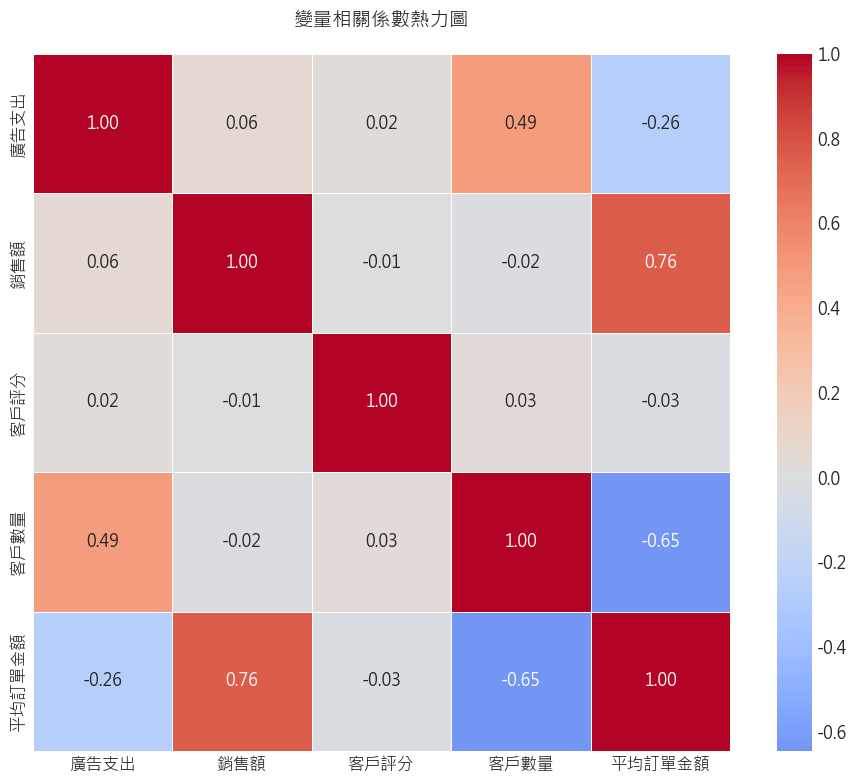

In [6]:
def correlation_heatmap():
    """創建相關係數熱力圖"""
    # 計算相關係數
    corr = data.corr()
    
    # 創建熱力圖
    plt.figure(figsize=(10, 8))
    
    # 使用seaborn的熱力圖
    sns.heatmap(corr, 
                annot=True,  # 顯示數值
                cmap='coolwarm',  # 使用藍紅配色
                center=0,  # 將0設為中心點
                fmt='.2f',  # 數值格式
                square=True,  # 正方形單元格
                linewidths=0.5)  # 網格線寬度
    
    plt.title('變量相關係數熱力圖', fontsize=14, pad=20)
    plt.tight_layout()
    plt.show()

correlation_heatmap()


## 5. 進階相關性分析

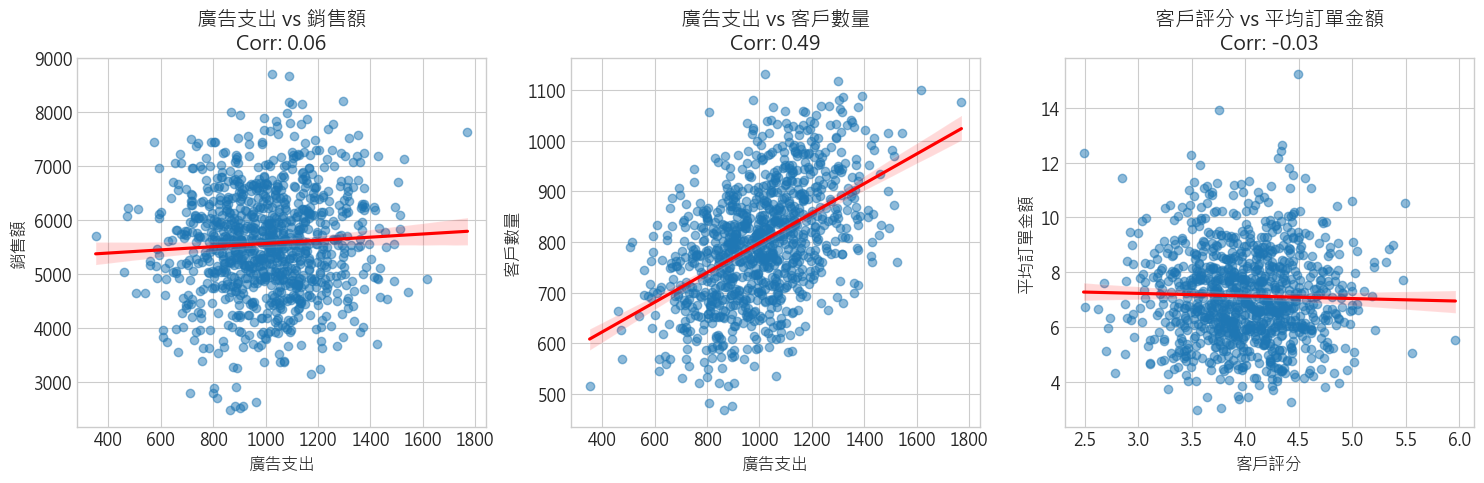

In [7]:
def advanced_correlation_analysis():
    """進行進階相關性分析"""
    # 選擇要分析的變量對
    var_pairs = [
        ('廣告支出', '銷售額'),
        ('廣告支出', '客戶數量'),
        ('客戶評分', '平均訂單金額')
    ]
    
    # 創建子圖
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    for i, (var1, var2) in enumerate(var_pairs):
        # 計算相關係數
        corr = stats.pearsonr(data[var1], data[var2])[0]
        
        # 繪製散點圖和核密度估計
        sns.regplot(data=data, x=var1, y=var2, ax=axes[i],
                   scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
        
        axes[i].set_title(f'{var1} vs {var2}\nCorr: {corr:.2f}')
    
    plt.tight_layout()
    plt.show()

advanced_correlation_analysis()


## 6. 非線性關係視覺化

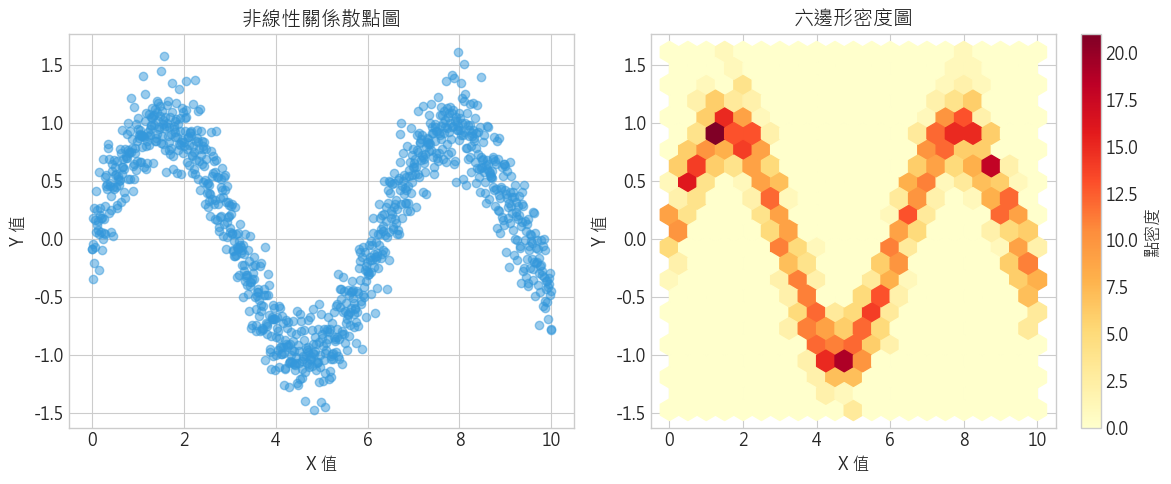

In [8]:
def nonlinear_relationship():
    """視覺化非線性關係"""
    # 創建非線性關係的示例數據
    x = np.linspace(0, 10, 1000)
    y = np.sin(x) + np.random.normal(0, 0.2, 1000)
    
    plt.figure(figsize=(12, 5))
    
    # 左側：散點圖
    plt.subplot(121)
    plt.scatter(x, y, alpha=0.5, color='#3498db')
    plt.title('非線性關係散點圖')
    plt.xlabel('X 值')
    plt.ylabel('Y 值')
    
    # 右側：六邊形密度圖
    plt.subplot(122)
    plt.hexbin(x, y, gridsize=20, cmap='YlOrRd')
    plt.colorbar(label='點密度')
    plt.title('六邊形密度圖')
    plt.xlabel('X 值')
    plt.ylabel('Y 值')
    
    plt.tight_layout()
    plt.show()

nonlinear_relationship()


## 7. 相關性分析最佳實踐

在進行相關性分析和視覺化時，應注意以下幾點：

1. **數據預處理**
   - 處理異常值和缺失值
   - 確保數據的可比性
   - 考慮數據轉換（如對數轉換）

2. **視覺化選擇**
   - 根據數據特性選擇合適的圖表
   - 考慮數據量大小選擇適當的視覺化方法
   - 注意圖表的可讀性和美觀性

3. **解釋注意事項**
   - 相關不等於因果
   - 注意非線性關係
   - 考慮其他影響因素


## 8. 總結

本課程介紹了多種相關性視覺化方法：

- **基本散佈圖**：直觀展示兩個變量的關係
- **散佈圖矩陣**：同時查看多個變量之間的關係
- **相關係數熱力圖**：整體把握所有變量間的相關性
- **進階分析**：包括回歸線、密度估計等
- **非線性關係**：處理和視覺化更複雜的關係

這些技術是數據分析中不可或缺的工具，能幫助我們更好地理解數據特徵和變量關係。